# 3. Implementing the Watts-Strogatz small-world model

You will implement the Watts-Strogatz small-world model

which is a very simple network model that yields small diameter as well as high level of clustering. 

In practice the Watts-Strogatz model is a ring lattice where some of the links have been randomly rewired.

The model has three parameters: 
- network size N , 
- m (each node on the ring connects to m nearest neighbors both to the left and to the right), and 
- p, the probability of rewiring one end of each link to a random endpoint node.

In [1]:
from __future__ import print_function
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

Implement the Watts-Strogatz small world model and visualize the network
using

- N = 15, m = 2 p = 0.1, and
- N = 100, m = 2 p = 0.05 

using a circular layout algorithm

In [2]:
def ring(n, m):
    """
    This function creates the basic ring (to be rewired) with n nodes
    in which each node is connected to m nodes on the left and right.

    Parameters
    ----------
    n : int
      Number of nodes
    m : int
      Number of neighbors to connect left and right

    Returns
    -------
    network : graph
             The basic ring before rewiring
    """
    network = nx.Graph()
    span = int(m/2)

    for node in range(n):
        network.add_node(node)

    for node in range(n):
        for reach in range(-1*span, span+1):
            if span != 0:
                neighbour_node = node + reach
                if neighbour_node < 0:
                    neighbour_node = n - neighbour_node
                if neighbour_node >= n:
                    neighbour_node = neighbour_node - n
                network.add_edge(node, neighbour_node)

    return network

In [3]:
def ws(n, m, p):
    """
    This function call the ring() function to make a basic ring and then
    rewires each link with  probability p and also prints the total number of
    links and the number of rewired links.
    Note self-loops are not allowed when rewiring (check that you do not rewire
    the end of a link to the node at its other end!) 

    Parameters
    ----------
    n : int
      Number of nodes
    m : int
      Number of neighbors to connect left and right
    p : float
        Rewiring probability

    Returns
    -------
    network : graph
        The Watts-Strogatz small-world network

    """
    network = ring(n, m)
    all_edges = list(network.edges()) # same as copy
    
    rewired_num = 0 # tracks the number of rewired links
    total_num = len(all_edges) # tracks the total number of links in the network


    
    for edges in all_edges:
        if np.random.rand() < p:
            rewired_num += 1
            # rewire
            u, v = edges
            network.remove_edge(u, v)
            other_node = random.choice(list(nx.non_neighbors(network, u)))
            network.add_edge(u, other_node)
            
    print("total number of links:")
    print(total_num)
    print("number of rewired links:")
    print(rewired_num)
    return network

Total number of edges for n = 15, m = 2, p = 0 :
30


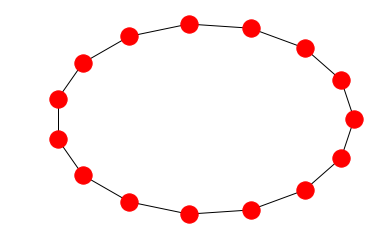

In [4]:
np.random.seed(42)
#visualizing the rings for p = 0 ...
graph1 = ring(15, 2)
fig1 = plt.figure()
ax = fig1.add_subplot(111)
nx.draw_circular(graph1)

figure_filename = 'Small_world_ring.pdf'


fig1.savefig(figure_filename)
# or just use plt.show() and save manually

total_num_edges = len(list(graph1.edges()))
print("Total number of edges for n = 15, m = 2, p = 0 :")
print(total_num_edges)

total number of links:
200
number of rewired links:
102


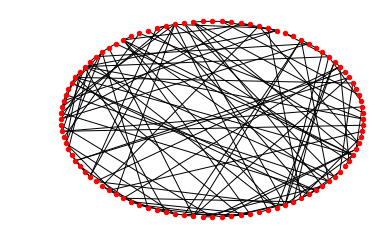

In [5]:
#... and p = 0.5
graph2 = ws(100, 2, 0.5)
fig2 = plt.figure()
ax = fig2.add_subplot(111)
nx.draw_circular(graph2, node_size=20)

figure_filename = './Small_world_rewired.pdf'


fig2.savefig(figure_filename)
# or just use plt.show() and save manually

### b. Plot 

the relative average clustering coefficient c(p)/c(p = 0) and average shortest
path length l(p)/l(p = 0) vs. p in your network, for p = 0.001, . . . , 1.0 (see template for
the log-spaced values). Here, relative=average value for given p divided by the same value
for p = 0. Use N = 500 and m = 2.

total number of links:
3000
number of rewired links:
2
c_rewired 0.4986
l_rewired 86.50425825825826
total number of links:
3000
number of rewired links:
7
c_rewired 0.4960333333333333
l_rewired 52.71786586586587
total number of links:
3000
number of rewired links:
14
c_rewired 0.4921
l_rewired 35.76871271271271
total number of links:
3000
number of rewired links:
24
c_rewired 0.48693333333333344
l_rewired 27.563575575575577
total number of links:
3000
number of rewired links:
43
c_rewired 0.47636666666666694
l_rewired 18.307605605605605
total number of links:
3000
number of rewired links:
98
c_rewired 0.4464333333333337
l_rewired 11.905793793793794
total number of links:
3000
number of rewired links:
185
c_rewired 0.3924428571428573
l_rewired 8.81071071071071
total number of links:
3000
number of rewired links:
372
c_rewired 0.3047404761904764
l_rewired 6.85646046046046
total number of links:
3000
number of rewired links:
751
c_rewired 0.17809119769119733
l_rewired 5.4622262262262264
t

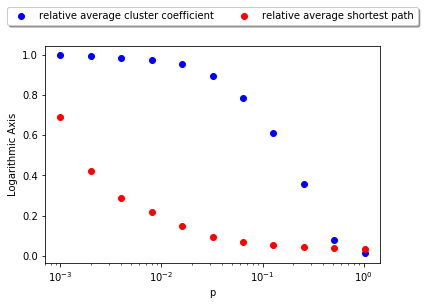

In [6]:
# Produce the basic ring network and calculate the average clustering
# coefficient and average shortest path of the network
basic_ring = ring(1000, 5)

c_basic = nx.average_clustering(basic_ring)
l_basic = nx.average_shortest_path_length(basic_ring)

probability = [0.001*(2**n) for n in range(11)] #[0.001, 0.002, 0.004, ...]
relative_c = []
relative_l = []

for p in probability:
    smallworld = ws(1000, 5, p)

    # gets all connected components; mostly there is just one:
    components = nx.connected_component_subgraphs(smallworld)

    # finds the largest to be used for the average path length:
    largest_component = max(components, key=len)

    c_rewired = nx.average_clustering(smallworld)
    l_rewired = nx.average_shortest_path_length(largest_component)
    print('c_rewired ', c_rewired)
    print('l_rewired ', l_rewired)
    
    # Update relative_c and relative_l
    relative_c.append( c_rewired / c_basic )
    relative_l.append( l_rewired / l_basic )

fig3 = plt.figure()
ax = fig3.add_subplot(111)
ax.semilogx(probability, relative_c, marker='o', ls='', color='b',
            label='relative average cluster coefficient')
ax.semilogx(probability, relative_l, marker='o', ls='', color='r',
            label='relative average shortest path')

plt.ylabel("Logarithmic Axis")
plt.xlabel("p")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=3, fancybox=True, shadow=True)

figure_filename = 'WS_relative_c_and_l.pdf'


fig3.savefig(figure_filename)

# or just use plt.show() and save manually

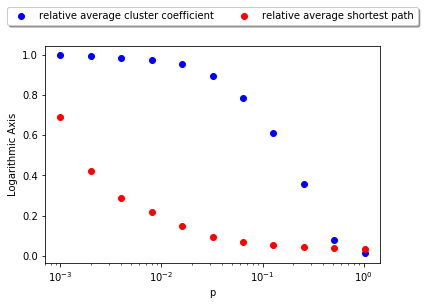

In [7]:
fig3 = plt.figure()
ax = fig3.add_subplot(111)
ax.semilogx(probability, relative_c, marker='o', ls='', color='b',
            label='relative average cluster coefficient')
ax.semilogx(probability, relative_l, marker='o', ls='', color='r',
            label='relative average shortest path')

plt.ylabel("Logarithmic Axis")
plt.xlabel("p")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=3, fancybox=True, shadow=True)